# Building A Handwritten Digits Classifier

## Introduction

In this Guided Project, we'll:
- explore why image classification is a hard task
- observe the limitations of traditional machine learning models for image classification
- train, test, and improve a few different deep neural networks for image classification

Deep neural networks have been used to reach state-of-the-art performance on image classification tasks in the last decade. For some image classification tasks, deep neural networks actually perform as well as or slightly better than the human benchmark. You can read about the history of deep neural networks [here](https://arxiv.org/pdf/1803.01164.pdf).

We'll build models that can classify handwritten digits. Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detailed in [this paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.852.5499&rep=rep1&type=pdf).

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of **sklearn.datasets**. The **load_digits()** function returns a copy of the [hand-written digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from UCI.

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

## Importing packages and loading datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier

%matplotlib inline
pd.options.display.max_columns = 999

In [2]:
digits = load_digits()

## Working With Image Data

In [3]:
target = pd.Series(digits["target"])
features = pd.DataFrame(digits["data"])
features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Text(0.5, 1.0, 'This is a 2')

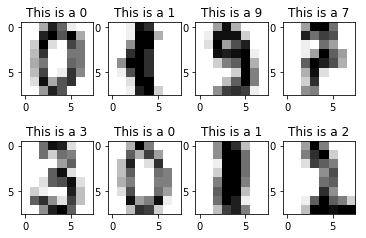

In [4]:
# Generate a scatter plot grid, with 2 rows and 4 columns.
# In the first row:
#  - Display the images corresponding to rows 0, 100, 200, and 300.
# In the second row:
#  - Display the images corresponding to rows 1000, 1100, 1200, and 1300.

f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(features.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 0].set_title("This is a " + str(target.iloc[0]))
axarr[0, 1].imshow(features.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].set_title("This is a " + str(target.iloc[99]))
axarr[0, 2].imshow(features.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].set_title("This is a " + str(target.iloc[199]))
axarr[0, 3].imshow(features.iloc[299].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].set_title("This is a " + str(target.iloc[299]))

axarr[1, 0].imshow(features.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 0].set_title("This is a " + str(target.iloc[999]))
axarr[1, 1].imshow(features.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].set_title("This is a " + str(target.iloc[1099]))
axarr[1, 2].imshow(features.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].set_title("This is a " + str(target.iloc[1199]))
axarr[1, 3].imshow(features.iloc[1299].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].set_title("This is a " + str(target.iloc[1299]))

## K-Nearest Neighbors Model

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption.

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

In [5]:
def train(num, train_features, train_target):
    kn = KNeighborsClassifier(n_neighbors=num)
    kn.fit(train_features, train_target)
    return kn

def test(model, test_features, test_target):
    prediction = model.predict(test_features)
    accuracy = accuracy_score(test_target,prediction)
    return accuracy

def cross_validate(k):
    accuracies = []
    kf = KFold(n_splits=4)
    for train_index, test_index in kf.split(features):
        train_features = features.loc[train_index]
        test_features = features.loc[test_index]
        train_target = target.loc[train_index]
        test_target = target.loc[test_index]
        model = train(k, train_features, train_target)
        accuracy = test(model, test_features, test_target)
        accuracies.append(accuracy)
    return np.mean(accuracies)

1     0.967723
2     0.961601
3     0.962718
4     0.964948
5     0.962167
6     0.958827
7     0.957159
8     0.957158
9     0.954380
10    0.952710
11    0.952705
12    0.953821
13    0.951034
14    0.953263
15    0.951592
dtype: float64


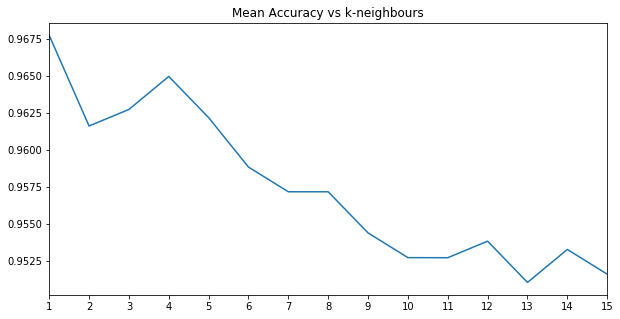

In [6]:
k_values = range(1,16)
k_accuracies = {}

for k in k_values:
    accuracy = cross_validate(k)
    k_accuracies[k] = accuracy
    
k_accuracies_series = pd.Series(k_accuracies)
print(k_accuracies_series)

plt.figure(figsize=(10,5))
plt.title("Mean Accuracy vs k-neighbours")
plt.xticks(range(1,16))
k_accuracies_series.plot()

## Neural Network With One Hidden Layer

There are a few downsides to using k-nearest neighbors:
- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore

Let's now try a neural network with a single hidden layer, using the **MLPClassifier package** from scikit-learn.

In [7]:
def train(neurons, train_features, train_target):
    nn = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=1000, random_state=2)
    nn.fit(train_features, train_target)
    return nn

def test(model, test_features, test_target):
    prediction = model.predict(test_features)
    accuracy = accuracy_score(test_target,prediction)
    return accuracy

def cross_validate(n):
    accuracies = []
    kf = KFold(n_splits=4)
    for train_index, test_index in kf.split(features):
        train_features = features.loc[train_index]
        test_features = features.loc[test_index]
        train_target = target.loc[train_index]
        test_target = target.loc[test_index]
        model = train(n, train_features, train_target)
        accuracy = test(model, test_features, test_target)
        accuracies.append(accuracy)
    return np.mean(accuracies)

In [8]:
neurons = [8,16,32,64,128,256]
nn_accuracies = {}

for n in neurons:
    accuracy = cross_validate(n)
    nn_accuracies[n] = accuracy
    
nn_accuracies_series = pd.Series(nn_accuracies)
print(nn_accuracies_series)

8      0.910401
16     0.927645
32     0.943229
64     0.935444
128    0.943234
256    0.952695
dtype: float64


It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately 91% to approximately 95.2%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 96% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

## Neural Network With Two Hidden Layer

Adding more neurons to a single hidden layer vastly improved the classification accuracy.

Let's try using two hidden layers and continue to increase the number of neurons in each layer.

We will use 4-fold cross validation and train a neural network model using 2 hidden layers:
- 64 neurons in the first hidden layer and second hidden layer.
- 128 neurons in the first hidden layer and second hidden layer.
- 256 neurons in the first hidden layer and second hidden layer.

In [9]:
def train(neurons, train_features, train_target):
    nn = MLPClassifier(hidden_layer_sizes=(neurons,neurons,), max_iter=1000, random_state=2)
    nn.fit(train_features, train_target)
    return nn

In [10]:
neurons = [64,128,256]
nn_accuracies = {}

for n in neurons:
    accuracy = cross_validate(n)
    nn_accuracies[n] = accuracy
    
nn_accuracies_series = pd.Series(nn_accuracies)
print(nn_accuracies_series)

64     0.933218
128    0.949350
256    0.956037
dtype: float64


Using 2 hidden layers improved our simple accuracy to 95.6%. While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

## Neural Network With Three Hidden Layer

Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's **increase the number of folds we use for k-fold cross validation to 6** while testing networks with 3 hidden layers.

We will use 6-fold cross validation and train a neural network model using 3 hidden layers:
- 10 neurons in the first hidden layer and second hidden layer.
- 64 neurons in the first hidden layer and second hidden layer.
- 128 neurons in the first hidden layer and second hidden layer.

In [11]:
def train(neurons, train_features, train_target):
    nn = MLPClassifier(hidden_layer_sizes=(neurons,neurons,neurons,), max_iter=1000, random_state=2)
    nn.fit(train_features, train_target)
    return nn

def cross_validate(n):
    accuracies = []
    kf = KFold(n_splits=6)
    for train_index, test_index in kf.split(features):
        train_features = features.loc[train_index]
        test_features = features.loc[test_index]
        train_target = target.loc[train_index]
        test_target = target.loc[test_index]
        model = train(n, train_features, train_target)
        accuracy = test(model, test_features, test_target)
        accuracies.append(accuracy)
    return np.mean(accuracies)

In [12]:
neurons = [10,64,128]
nn_accuracies = {}

for n in neurons:
    accuracy = cross_validate(n)
    nn_accuracies[n] = accuracy
    
nn_accuracies_series = pd.Series(nn_accuracies)
print(nn_accuracies_series)

10     0.904277
64     0.945474
128    0.954374
dtype: float64


Using 3 hidden layers improved our simple accuracy to 95.5%, even with 6-fold cross validation. This seems to be in line with the research literature out there about deep neural networks for computer vision. Having more layers and more neurons tends to improve the network's performance.